In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats

In [2]:
df = pd.read_csv('2019.csv')
df.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
df[['Generosity','Perceptions of corruption']].describe()

,Generosity,Perceptions of corruption
count,156.000000,156.000000
mean,0.184846,0.110603
std,0.095254,0.094538
min,0.000000,0.000000
25%,0.108750,0.047000
50%,0.177500,0.085500
75%,0.248250,0.141250
max,0.566000,0.453000


In [4]:
print(df['Social support'].describe())
q1 = 1.055750
q3 = 1.452500

count    156.000000
mean       1.208814
std        0.299191
min        0.000000
25%        1.055750
50%        1.271500
75%        1.452500
max        1.624000
Name: Social support, dtype: float64


In [5]:
iqr = q3 - q1
lb = q1 - (1.5*iqr);print(lb)
ub = q3 + (1.5*iqr);print(ub)

0.46062500000000006
2.047625


In [6]:
trueSC = df[(df['Social support']>lb) & (df['Social support']<ub)]
trueSC

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025


In [7]:
belowSC = df[df['Social support']<lb]
belowSC

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
101,102,Benin,4.883,0.393,0.437,0.397,0.349,0.175,0.082
144,145,Burundi,3.775,0.046,0.447,0.380,0.220,0.176,0.180
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [8]:
df[df['Country or region']=='Singapore']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
33,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453


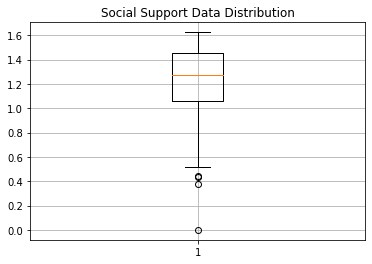

In [9]:
fig, ax = plt.subplots()
plt.boxplot(df['Social support'])
plt.title('Social Support Data Distribution')
plt.grid()
plt.show()

In [10]:
df.head(1)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


C:\Users\Chitito Audithio\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


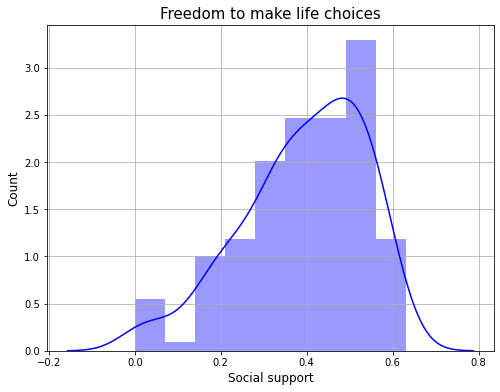

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(df['Freedom to make life choices'],color='blue')
plt.title('Freedom to make life choices',size=15)
plt.ylabel('Count',size=12)
plt.xlabel('Social support',size=12)
plt.grid()
plt.show()
# apabila membuktikan satu distribusi gunakan histogram atau barplot lalu, axis satunya menggunakan frequency saja
# arti right skewed adalah lebih banyak angka yang positif dibanding yang negatif

In [12]:
#spearman itu untuk untuk data integer
#pearson itu untuk data float
data = df[['GDP per capita','Score']]
print(data.corr(method='pearson'))
data2 = df[['Social support','Score']]
print(data2.corr(method='pearson'))
data3 = df[['Healthy life expectancy','Score']]
print(data3.corr(method='pearson'))

                GDP per capita     Score
GDP per capita        1.000000  0.793883
Score                 0.793883  1.000000
                Social support     Score
Social support        1.000000  0.777058
Score                 0.777058  1.000000
                         Healthy life expectancy     Score
Healthy life expectancy                 1.000000  0.779883
Score                                   0.779883  1.000000


       GDP Per Capita  Social Support  Healthy Life Expectancy
Score        0.793883        0.777058                 0.779883


Text(0, 0.5, 'Score')

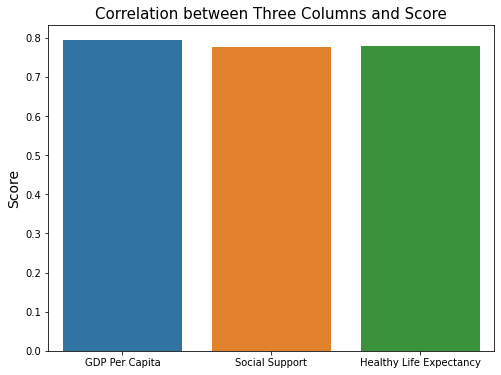

In [13]:
ScoreG = 0.793883
ScoreSS = 0.777058
ScoreH = 0.779883
data = {'GDP Per Capita':[0.793883],'Social Support':[0.777058],'Healthy Life Expectancy':[0.779883]}
Score = {'Score'}
dataF = pd.DataFrame(data,index=Score)
print(dataF)
fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(data=dataF)
plt.title('Correlation between Three Columns and Score',size=15)
plt.ylabel('Score',size=14)

In [14]:
df.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [15]:
df['Score'].mean()
dff = df[df['Score']>5.407096153846155]
dff[['Country or region']].head(10)

,Country or region
0,Finland
1,Denmark
2,Norway
3,Iceland
4,Netherlands
5,Switzerland
6,Sweden
7,New Zealand
8,Canada
9,Austria


       Country or region  GDP per capita
28                 Qatar           1.684
13            Luxembourg           1.609
33             Singapore           1.572
20  United Arab Emirates           1.503
50                Kuwait           1.500


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Qatar'),
  Text(1, 0, 'Luxembourg'),
  Text(2, 0, 'Singapore'),
  Text(3, 0, 'United Arab Emirates'),
  Text(4, 0, 'Kuwait')])

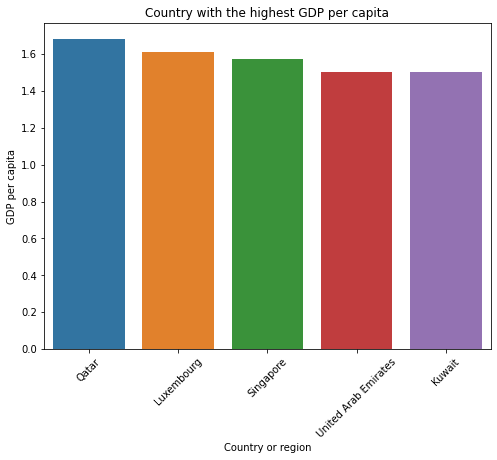

In [16]:
a = dff.sort_values(by = ['GDP per capita'],ascending=False).head(5)
ac = a[['Country or region','GDP per capita']]
print(ac)
plt.figure(figsize=(8,6))
plt.title('Country with the highest GDP per capita')
sns.barplot(data=ac,x='Country or region',y='GDP per capita')
plt.xticks(rotation=45)

    Country or region  Perceptions of corruption
70            Moldova                      0.000
47            Romania                      0.005
45             Kosovo                      0.006
37           Slovakia                      0.014
38  Trinidad & Tobago                      0.016


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Moldova'),
  Text(1, 0, 'Romania'),
  Text(2, 0, 'Kosovo'),
  Text(3, 0, 'Slovakia'),
  Text(4, 0, 'Trinidad & Tobago')])

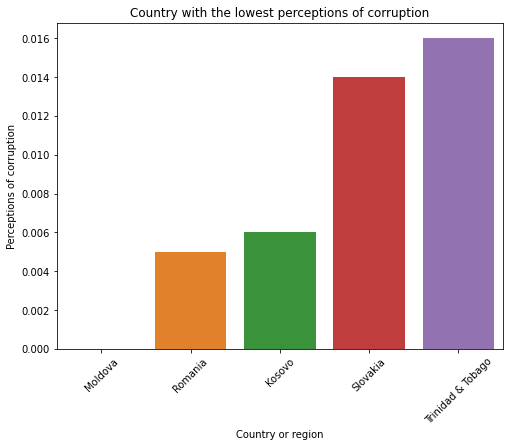

In [17]:
b =  dff.sort_values(by = ['Perceptions of corruption'],ascending=True).head(5)
bc = b[['Country or region','Perceptions of corruption']]
print(bc)
plt.figure(figsize=(8,6))
plt.title('Country with the lowest perceptions of corruption')
sns.barplot(data=bc,x='Country or region',y='Perceptions of corruption')
plt.xticks(rotation=45)

   Country or region  Generosity
41         Lithuania       0.043
19    Czech Republic       0.046
65          Portugal       0.047
46         Argentina       0.066
57             Japan       0.069


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Lithuania'),
  Text(1, 0, 'Czech Republic'),
  Text(2, 0, 'Portugal'),
  Text(3, 0, 'Argentina'),
  Text(4, 0, 'Japan')])

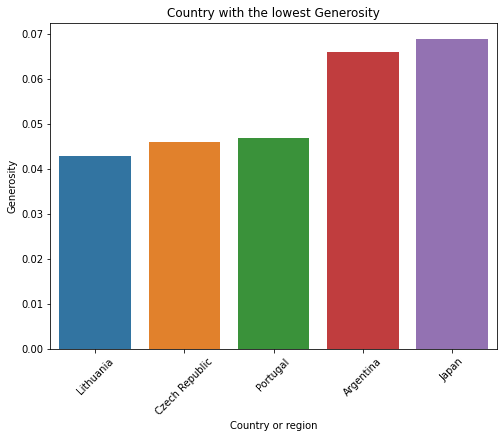

In [18]:
c = dff.sort_values(by = ['Generosity'],ascending=True).head(5)
cb = c[['Country or region','Generosity']]
print(cb)
plt.figure(figsize=(8,6))
plt.title('Country with the lowest Generosity')
sns.barplot(data=cb,x='Country or region',y='Generosity')
plt.xticks(rotation=45)